# Exploring generations

In [10]:
# improts
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import re
from pathlib import Path
from glob import glob
import pickle
import shutil
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
import py3Dmol

# For highlight colors
from matplotlib.colors import ColorConverter

from ipywidgets import interact,fixed,IntSlider

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


#IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 500,500
IPythonConsole.drawOptions.addAtomIndices = True

templates = Path('../templates/')
generation_path = Path('~').expanduser()/'generation_correct_scoring'

font = {'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)


In [11]:
def draw_generation(
    mols,
    width=800,
    height=600,
    Hs=False,
    confId=-1,
    multipleConfs=False,
    atomlabel=False,
    hit_ats=None,
):
    try:
        p = py3Dmol.view(width=width, height=height)
        if type(mols) is not list:
            mols = [mols]
        for mol in mols:
            if multipleConfs:
                for conf in mol.GetConformers():
                    mb = Chem.MolToMolBlock(mol, confId=conf.GetId())
                    p.addModel(mb, "sdf")
            else:
                if type(mol) is str:
                    if os.path.splitext(mol)[-1] == ".xyz":
                        xyz_f = open(mol)
                        line = xyz_f.read()
                        xyz_f.close()
                        p.addModel(line, "xyz")
                else:
                    mb = Chem.MolToMolBlock(mol, confId=confId)
                    p.addModel(mb, "sdf")
        p.setStyle({"stick": {"radius": 0.2}, "sphere": {"radius":0.3}})
        if atomlabel:
            p.addPropertyLabels("index")  # ,{'elem':'H'}
        # 
        if hit_ats:
            hit_ats = [x for tup in hit_ats for x in tup]
            for atom in hit_ats:
                v = mol.GetConformer().GetAtomPosition(atom)
                v.addSphere(
                    {
                        "center": {"x": p.x, "y": p.y, "z": p.z},
                        "radius": 0.9,
                        "color": "green",
                        "alpha": 0.8,
                    }
                )
            v.setBackgroundColor("white")
            
        p.zoomTo()
        p.update()
        # p.show()
    except Exception as e:
        print(e)
        print("py3Dmol, RDKit, and IPython are required for this feature.")

# The original structure as reference:  

In [12]:
Mo_hipt_path = '/home/magstr/Documents/nitrogenase/schrock/reference_structures/mo.xyz'
draw_generation(Mo_hipt_path)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

{"stick": {"radius": 0.2}{"stick": {"radius": 0.2}### First test generation

In [13]:
templates = Path('../templates/')
generation_path = Path('~').expanduser()/"Documents/generation_data/generation_test_3foldnew"

In [14]:
files = generation_path.rglob('*xtbopt.xyz')
paths = sorted(files)

In [15]:
Mo_NH3_paths = [path for path in paths if 'Mo' in str(path.parents[1])] 
catalyst_paths = [path for path in paths if 'catalyst' in str(path.parents[1])] 

In [16]:
len(catalyst_paths)

201

In [17]:
confs = catalyst_paths

def conf_viewer(idx):
    mol = confs[idx]
    gen = confs[idx].parts[-3].split('_')[0][1:]
    print(f'Generation : {gen}')
    return draw_generation(str(confs[idx]))

interact(conf_viewer, idx=IntSlider(min=0,max=len(confs)-1, step=1))
# 216, 
# 38 shows something along the lines of HIPT. 
# 54 is a larger one
# 260 water
# 266 weird one

# 287 amines

interactive(children=(IntSlider(value=0, description='idx', max=200), Output()), _dom_classes=('widget-interac…

<function __main__.conf_viewer(idx)>

In [18]:
confs = Mo_NH3_paths
interact(conf_viewer, idx=IntSlider(min=0,max=len(confs)-1, step=1))
#12


interactive(children=(IntSlider(value=0, description='idx', max=59), Output()), _dom_classes=('widget-interact…

<function __main__.conf_viewer(idx)>

### The best ones from final generation

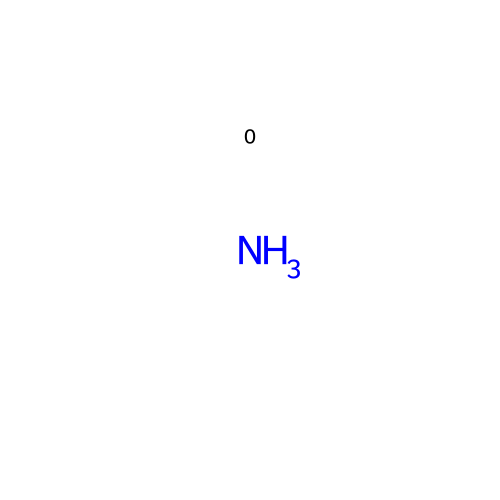

In [27]:
t

In [54]:
with open(generation_path/'GA02.pkl', "rb") as f:
    gen10 = pickle.load(f)

In [55]:
gen10.gen2pd()

score     energy sa_score  \
generation individual                                  
2          42         -29.936675 -29.936675     None   
           9          -25.257405 -25.257405     None   
           34         -24.489384 -24.489384     None   
1          43         -23.190092 -23.190092     None   
0          49         -22.764049 -22.764049     None   
1          42         -22.747147 -22.747147     None   
2          12         -22.586127 -22.586127     None   
1          2          -22.488653 -22.488653     None   
           7          -21.655648 -21.655648     None   
2          19         -21.378866 -21.378866     None   
           33         -20.395341 -20.395341     None   
1          14         -20.172735 -20.172735     None   
           28         -19.953119 -19.953119     None   
           34         -19.577492 -19.577492     None   
0          24         -18.462880 -18.462880     None   
2          39         -18.453035 -18.453035     None   
0          42         -18.418467 -18.418467     None   
2          14         -17.935261 -17.935261     None   
0          32         -17.156257 -17.156257     None   
2          26         -16.161201 -16.161201     None   
1          5          -15.904143 -15.904143     None   
2          47         -15.631362 -15.631362     None   
           29         -14.309151 -14.309151     None   
1          19         -14.255371 -14.255371     None   
2          21         -13.806500 -13.806500     None   
0          21         -13.180752 -13.180752     None   
2          27         -12.009656 -12.009656     None   
1          37         -11.490303 -11.490303     None   
           45         -11.219390 -11.219390     None   
2          35         -11.185118 -11.185118     None   
           40         -10.170966 -10.170966     None   
           8           -7.813176  -7.813176     None   
1          15          -6.706171  -6.706171     None   
0          30          -6.253849  -6.253849     None   
1          10          -5.000559  -5.000559     None   
2          3           -4.547905  -4.547905     None   
1          29          -3.820479  -3.820479     None   
0          2           -2.887081  -2.887081     None   
2          15          -0.923202  -0.923202     None   
           30           1.004040   1.004040     None   
0          27           1.704655   1.704655     None   
2          24           3.609753   3.609753     None   
1          21           5.690393   5.690393     None   
           30           5.747223   5.747223     None   
2          31           5.887657   5.887657     None   
           23           9.074940   9.074940     None   
0          18           9.776367   9.776367     None   
           28          11.694049  11.694049     None   
1          6           13.029381  13.029381     None   
           24          13.408855  13.408855     None   

                                                              rdkit_mol  
generation individual                                                    
2          42          <rdkit.Chem.rdchem.Mol object at 0x7fc8cf7fc670>  
           9           <rdkit.Chem.rdchem.Mol object at 0x7fc8cf7fc430>  
           34          <rdkit.Chem.rdchem.Mol object at 0x7fc8cf7fc530>  
1          43          <rdkit.Chem.rdchem.Mol object at 0x7fc8cf7fccf0>  
0          49          <rdkit.Chem.rdchem.Mol object at 0x7fc8cf7ef170>  
1          42          <rdkit.Chem.rdchem.Mol object at 0x7fc8cf7efb70>  
2          12          <rdkit.Chem.rdchem.Mol object at 0x7fc8cf7ef230>  
1          2           <rdkit.Chem.rdchem.Mol object at 0x7fc8cf7ef530>  
           7           <rdkit.Chem.rdchem.Mol object at 0x7fc8cf7effb0>  
2          19          <rdkit.Chem.rdchem.Mol object at 0x7fc8cf7ef8f0>  
           33          <rdkit.Chem.rdchem.Mol object at 0x7fc8cf7ef370>  
1          14          <rdkit.Chem.rdchem.Mol object at 0x7fc8cf7efa30>  
           28          <rdkit.Chem.rdchem.Mol object at 0x7fc8cf7efe70>  
    

In [56]:
mols = []
list_idx = []
cut_idx = []

for elem in gen10.survivors.molecules:
    mols.append(elem.rdkit_mol)
    
    list_idx.append(elem.idx)
    
    cut_idx.append(elem.cut_idx)
    

In [57]:
gen10.survivors.molecules[0].idx

(2, 42)

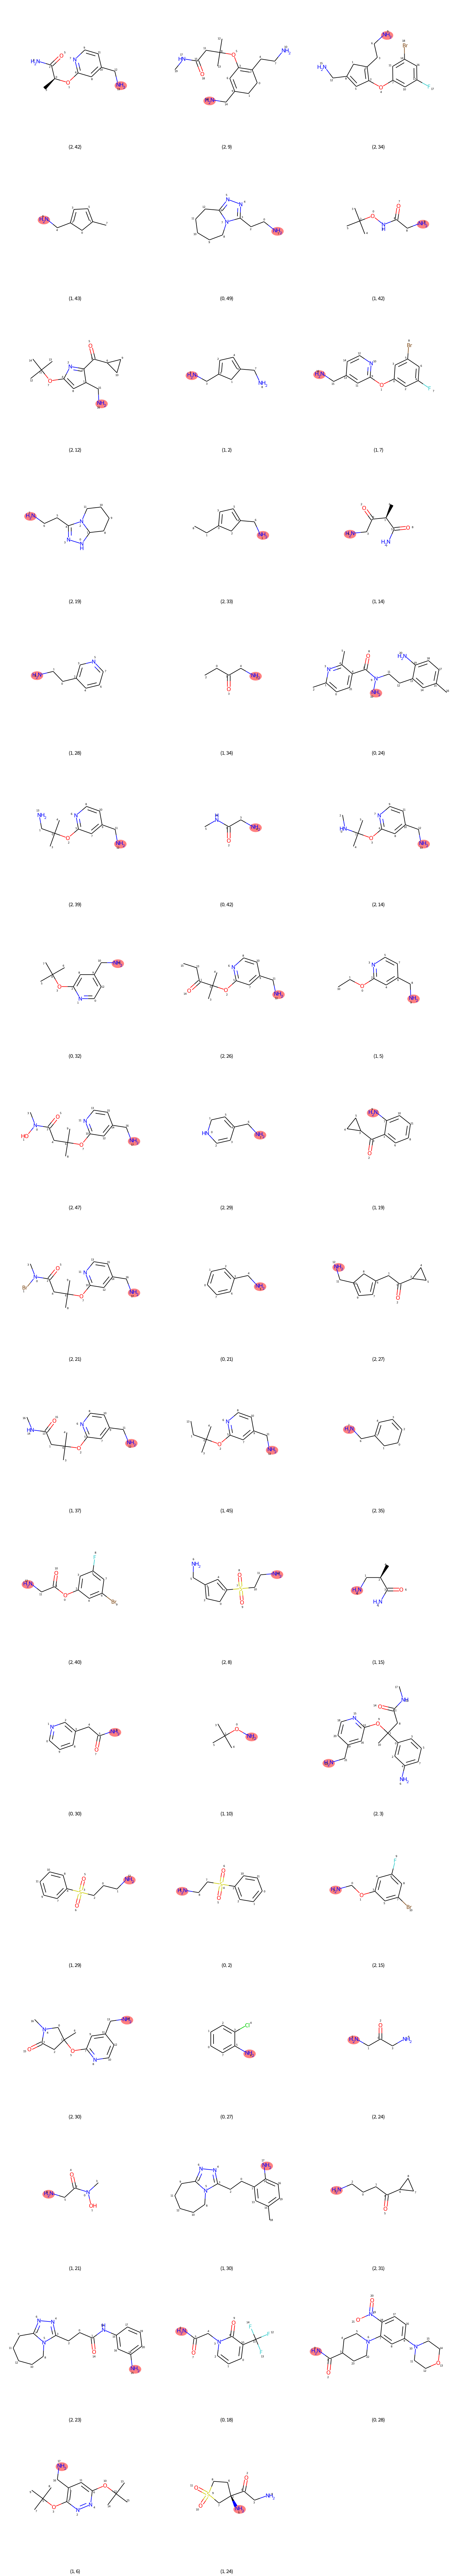

In [58]:
Draw.MolsToGridImage(mols,molsPerRow=3,maxMols=50,legends=[str(x) for x in list_idx], subImgSize=(500,500), highlightAtomLists=cut_idx,returnPNG=False)

In [37]:
img = Draw.MolsToGridImage(mols,molsPerRow=3,maxMols=6,legends=[str(x) for x in list_idx], subImgSize=(500,500), highlightAtomLists=cut_idx,returnPNG=False)
img.save('96gentop.png')   

/home/magstr/miniconda3/envs/mols_test/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:243: UserWarning: Truncating the list of molecules to be displayed to 6. Change the maxMols value to display more.
  % (maxMols))


### Energy evolution through time

In [38]:
# Get gen paths
gen_objects = sorted(generation_path.rglob('*GA*'))

In [39]:
avg_energy=[]
for elem in gen_objects:
    with open(elem, "rb") as f:
        gen = pickle.load(f)
        avg_energy.append(gen.gen2pd()['score'].mean())

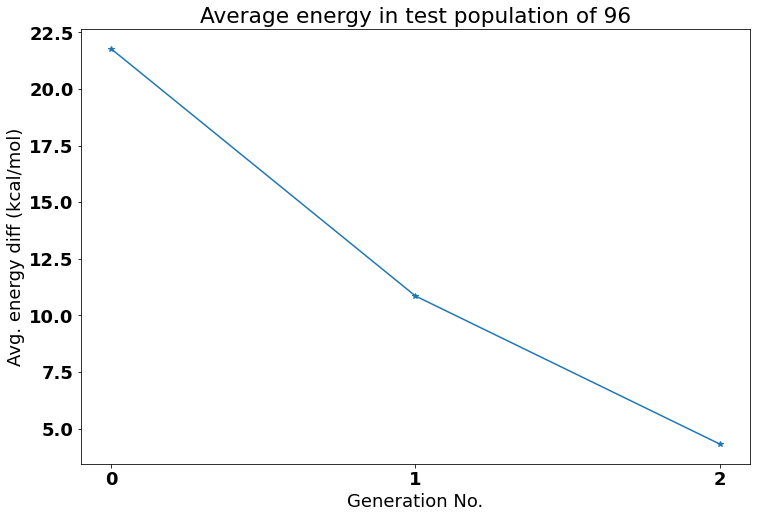

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(0,len(avg_energy))
ax.plot(x,avg_energy,'*-')
ax.set(xlabel='Generation No.', ylabel='Avg. energy diff (kcal/mol)', title='Average energy in test population of 96',xticks=x);
fig.savefig('generation__96_avgenergy.png', dpi=600)

# Flexible amines 3 gen

In [32]:
templates = Path('../templates/')
generation_path = Path('~').expanduser()/"Documents/generation_data/generation_amine_rework_20"

In [33]:
files = generation_path.rglob('*xtbopt.xyz')
paths = sorted(files)

In [34]:
Mo_NH3_paths = [path for path in paths if 'Mo' in str(path.parents[1])] 
catalyst_paths = [path for path in paths if 'catalyst' in str(path.parents[1])] 

In [37]:
confs = catalyst_paths

def conf_viewer(idx):
    mol = confs[idx]
    gen = confs[idx].parts[-3].split('_')[0][1:]
    print(f'Generation : {gen}')
    return draw_generation(str(confs[idx]))

interact(conf_viewer, idx=IntSlider(min=0,max=len(confs)-1, step=1))
# 216, 
# 38 shows something along the lines of HIPT. 
# 54 is a larger one
# 260 water
# 266 weird one

interactive(children=(IntSlider(value=0, description='idx', max=298), Output()), _dom_classes=('widget-interac…

<function __main__.conf_viewer(idx)>

In [38]:
confs = Mo_NH3_paths
interact(conf_viewer, idx=IntSlider(min=0,max=len(confs)-1, step=1))
#12


interactive(children=(IntSlider(value=0, description='idx', max=223), Output()), _dom_classes=('widget-interac…

<function __main__.conf_viewer(idx)>

## Final generation analysis

### What where the molecules in final generation? 

In [39]:
[path for path in paths if '/002_' in str(path.parents[1])] 

[PosixPath('/home/magstr/Documents/generation_data/generation_amine_rework_20/002_000_Mo_NH3/conf000/xtbopt.xyz'),
 PosixPath('/home/magstr/Documents/generation_data/generation_amine_rework_20/002_000_catalyst/conf000/xtbopt.xyz'),
 PosixPath('/home/magstr/Documents/generation_data/generation_amine_rework_20/002_001_Mo_NH3/conf000/xtbopt.xyz'),
 PosixPath('/home/magstr/Documents/generation_data/generation_amine_rework_20/002_001_catalyst/conf000/xtbopt.xyz'),
 PosixPath('/home/magstr/Documents/generation_data/generation_amine_rework_20/002_002_catalyst/conf000/xtbopt.xyz'),
 PosixPath('/home/magstr/Documents/generation_data/generation_amine_rework_20/002_003_Mo_NH3/conf000/xtbopt.xyz'),
 PosixPath('/home/magstr/Documents/generation_data/generation_amine_rework_20/002_003_catalyst/conf000/xtbopt.xyz'),
 PosixPath('/home/magstr/Documents/generation_data/generation_amine_rework_20/002_004_Mo_NH3/conf000/xtbopt.xyz'),
 PosixPath('/home/magstr/Documents/generation_data/generation_amine_rewo

In [40]:
final_gen_mo_nh3 = [path for path in paths if '/002_' in str(path.parents[1])] 

In [41]:
confs = final_gen_mo_nh3
interact(conf_viewer, idx=IntSlider(min=0,max=len(confs)-1, step=1))

interactive(children=(IntSlider(value=0, description='idx', max=26), Output()), _dom_classes=('widget-interact…

<function __main__.conf_viewer(idx)>

### The best ones from final generation

In [134]:
generation_path

PosixPath('/home/magstr/generation_correct_scoring')

In [135]:
with open(generation_path/'GA20.pkl', "rb") as f:
    gen20 = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/home/magstr/generation_correct_scoring/GA20.pkl'

In [45]:
#gen20.gen2pd()

In [46]:
mols = []
idx = []
for elem in gen20.survivors.molecules:
    mols.append(Chem.MolFromSmiles(elem.smiles))
    idx.append(elem.idx[1])

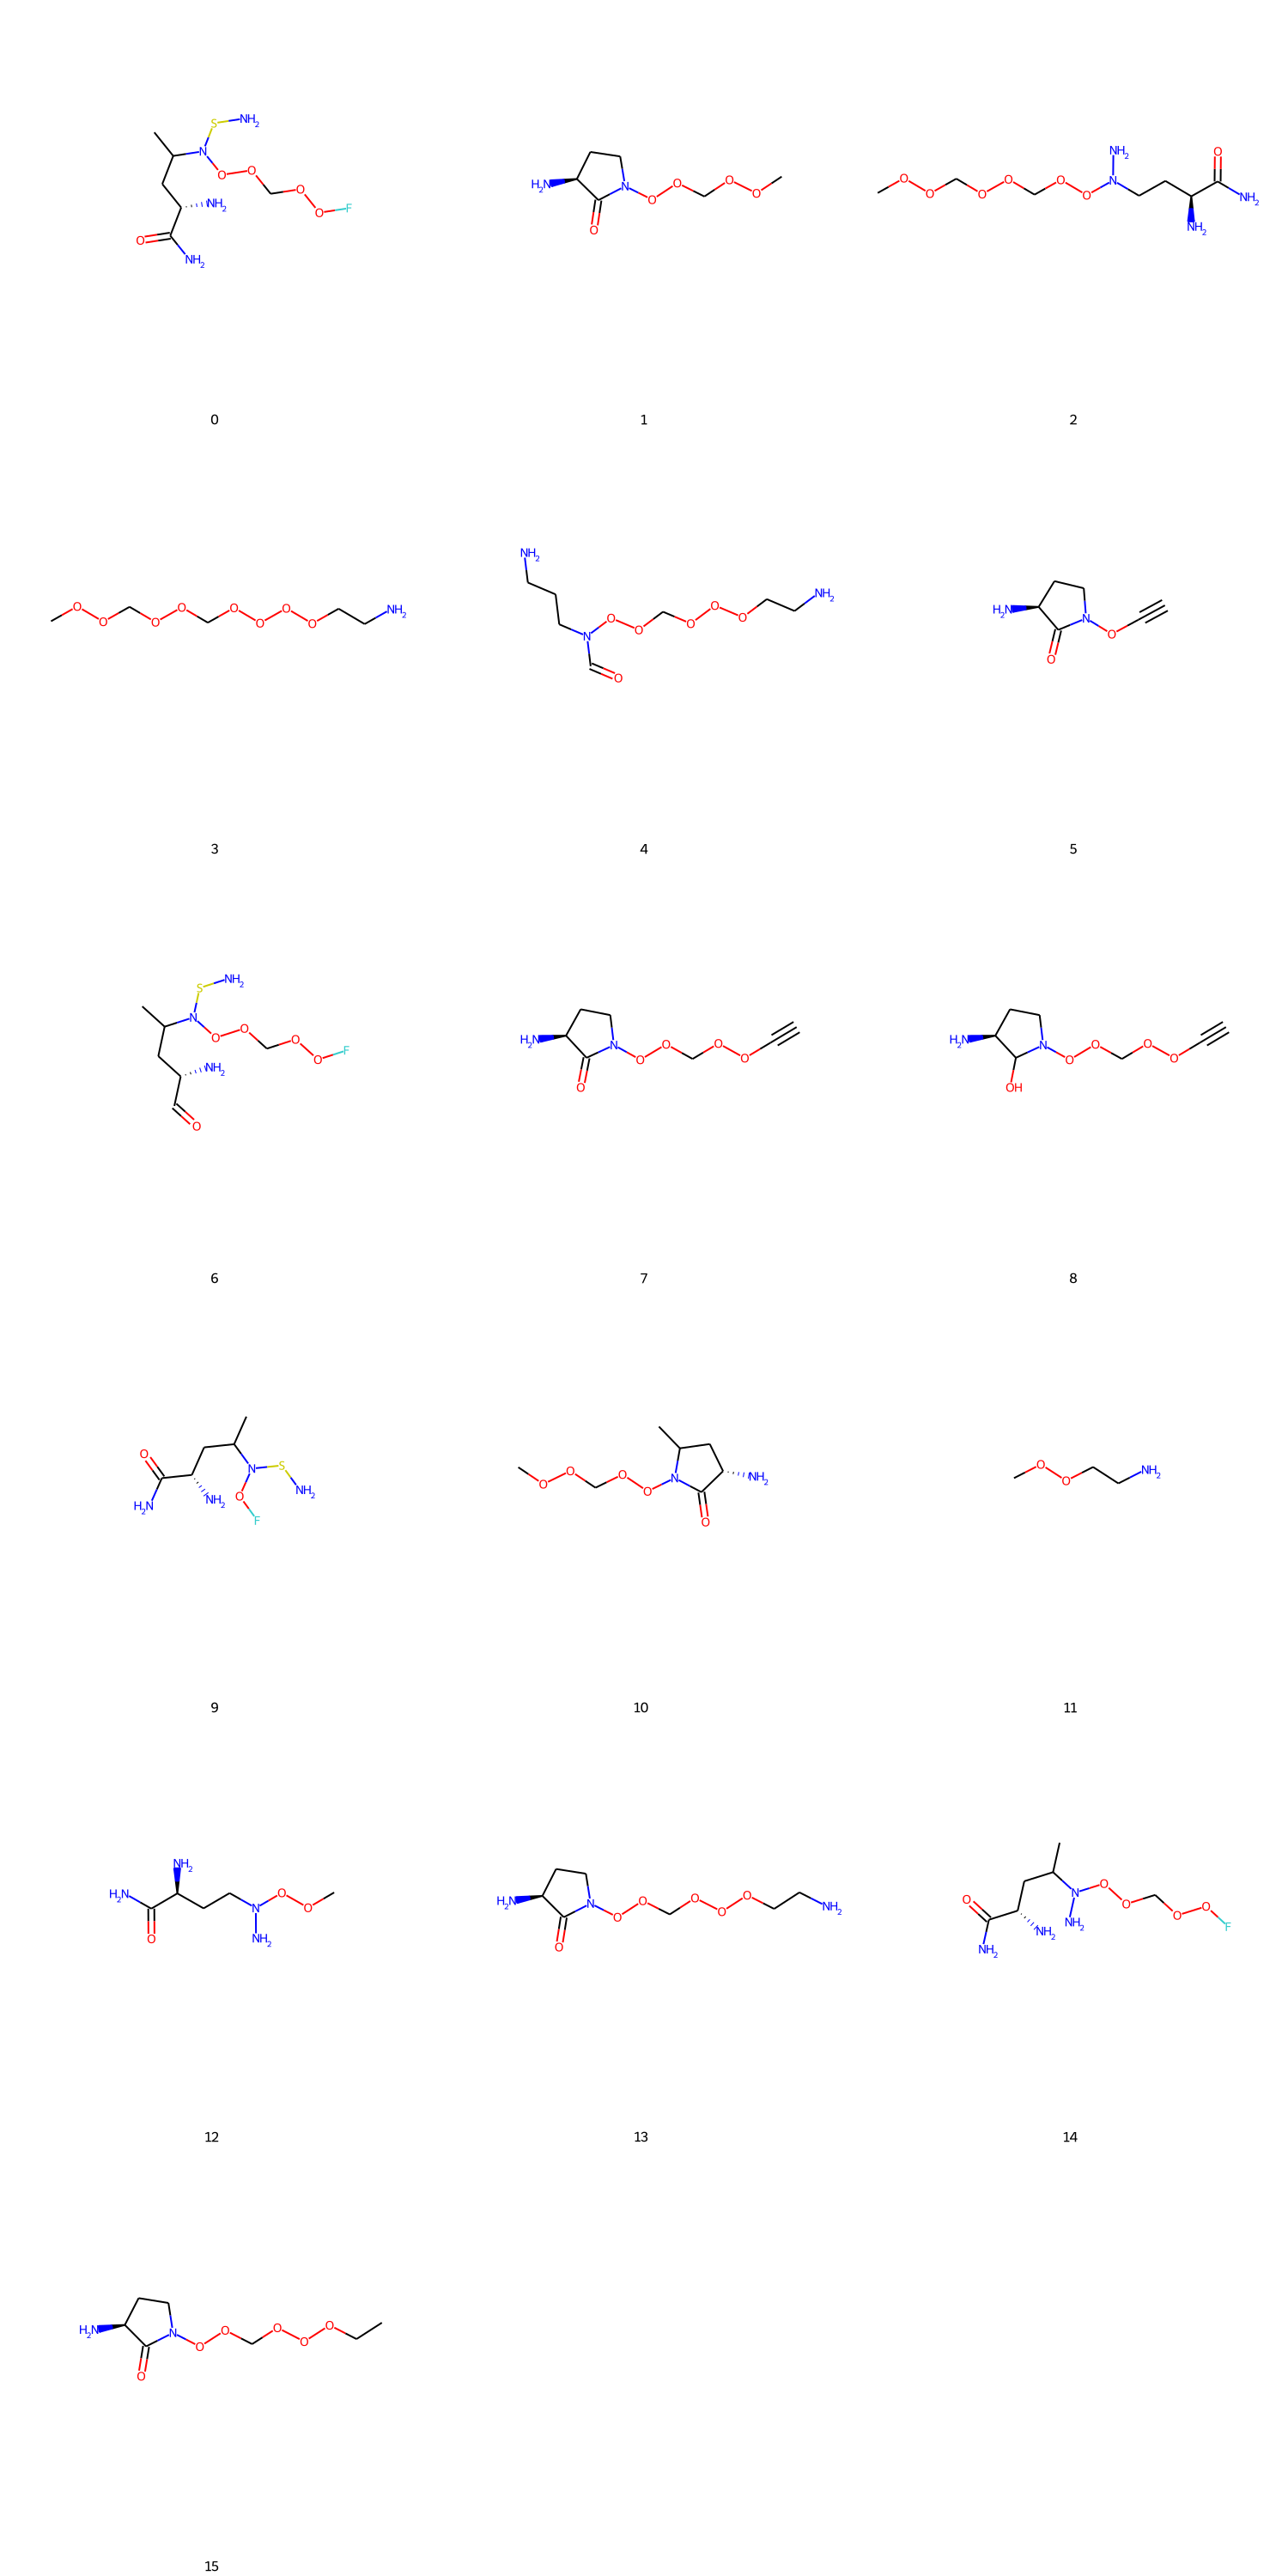

In [47]:
Draw.MolsToGridImage(mols,molsPerRow=3,maxMols=20,legends=[str(x) for x in idx], subImgSize=(500,500))

### Energy evolution through generation